In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder

In [107]:
# Read the data
df = pd.read_csv('data.csv')

In [33]:
num_cols = []
nom_cols = []
# Create a list with the title of each column with numerical data
for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        num_cols.append(col)
# Create a list with the title of each column with nominal data
for col in df.columns:
    if df[col].dtype == 'object':
        nom_cols.append(col)
nom_cols

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [45]:
#encode nominal data with label encoder

le = LabelEncoder()
df1 = df.apply(le.fit_transform)
print(df1.head(400))

      id  age  bp  sg  al  su  hemo  pcv  wc  rc  ...  pc  pcc  ba  htn  dm  \
0      0   40   3   3   1   0    90   31  35  30  ...   1    0   0    1   4   
1      1    5   0   3   4   0    49   25  19  45  ...   1    0   0    0   3   
2      2   54   3   1   2   3    32   18  33  45  ...   1    0   0    0   4   
3      3   40   2   0   4   0    48   19  25  17  ...   0    1   0    1   3   
4      4   43   3   1   2   0    52   22  31  24  ...   1    0   0    0   3   
..   ...  ...  ..  ..  ..  ..   ...  ...  ..  ..  ...  ..  ...  ..  ...  ..   
395  395   47   3   3   0   0    93   34  25  27  ...   1    0   0    0   3   
396  396   34   2   4   0   0   101   41  35  40  ...   1    0   0    0   3   
397  397    8   3   3   0   0    94   36  24  32  ...   1    0   0    0   3   
398  398   11   1   4   0   0    78   38  30  37  ...   1    0   0    0   3   
399  399   50   3   4   0   0    94   40  26  39  ...   1    0   0    0   3   

     cad  appet  pe  ane  classification  
0      1

In [132]:
#One Hot Encode The Nominal Data
df1 = df.copy()
for col in df1.columns:
    if df1[col].dtype == 'object':
        df1 = pd.concat([df1, pd.get_dummies(df1[col], prefix=col)], axis=1)
        df1.drop([col], axis=1, inplace=True)
cols = list(df1.columns.values)
cols.pop(cols.index('classification'))
df1 = df1[cols + ['classification']]
print(df1.head())

   id   age    bp     sg   al   su  hemo   pcv      wc   rc  ...  cad_\tno  \
0   0  48.0  80.0  1.020  1.0  0.0  15.4  44.0  7800.0  5.2  ...         0   
1   1   7.0  50.0  1.020  4.0  0.0  11.3  38.0  6000.0  NaN  ...         0   
2   2  62.0  80.0  1.010  2.0  3.0   9.6  31.0  7500.0  NaN  ...         0   
3   3  48.0  70.0  1.005  4.0  0.0  11.2  32.0  6700.0  3.9  ...         0   
4   4  51.0  80.0  1.010  2.0  0.0  11.6  35.0  7300.0  4.6  ...         0   

   cad_no  cad_yes  appet_good  appet_poor  pe_no  pe_yes  ane_no  ane_yes  \
0       1        0           1           0      1       0       1        0   
1       1        0           1           0      1       0       1        0   
2       1        0           0           1      1       0       0        1   
3       1        0           0           1      0       1       0        1   
4       1        0           1           0      1       0       1        0   

   classification  
0               1  
1               1  
2 

In [112]:
#split the data into features and target
X1 = df1.iloc[:, :-1].values
y1 = df1.iloc[:, -1].values
X1

array([[  0.,  48.,  80., ...,   0.,   1.,   0.],
       [  1.,   7.,  50., ...,   0.,   1.,   0.],
       [  2.,  62.,  80., ...,   0.,   0.,   1.],
       ...,
       [397.,  12.,  80., ...,   0.,   1.,   0.],
       [398.,  17.,  60., ...,   0.,   1.,   0.],
       [399.,  58.,  80., ...,   0.,   1.,   0.]])

In [114]:
# Create a list with the title of each column
col_names = df1.columns.values
#drop the last column name
col_names = col_names[:-1]
X1 = pd.DataFrame(X1)
X1.columns = col_names
X1

,id,age,bp,sg,al,su,hemo,pcv,wc,rc,...,dm_yes,cad_\tno,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
0,0.0,48.0,80.0,1.020,1.0,0.0,15.4,44.0,7800.0,5.2,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,7.0,50.0,1.020,4.0,0.0,11.3,38.0,6000.0,NaN,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,2.0,62.0,80.0,1.010,2.0,3.0,9.6,31.0,7500.0,NaN,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,3.0,48.0,70.0,1.005,4.0,0.0,11.2,32.0,6700.0,3.9,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,4.0,51.0,80.0,1.010,2.0,0.0,11.6,35.0,7300.0,4.6,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395.0,55.0,80.0,1.020,0.0,0.0,15.7,47.0,6700.0,4.9,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
396,396.0,42.0,70.0,1.025,0.0,0.0,16.5,54.0,7800.0,6.2,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
397,397.0,12.0,80.0,1.020,0.0,0.0,15.8,49.0,6600.0,5.4,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
398,398.0,17.0,60.0,1.025,0.0,0.0,14.2,51.0,7200.0,5.9,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [124]:
#split the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X1, y1, test_size = 0.25)
X_test


,id,age,bp,sg,al,su,hemo,pcv,wc,rc,...,dm_yes,cad_\tno,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
329,329.0,33.0,60.0,1.025,0.0,0.0,14.1,48.0,7800.0,5.1,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
224,224.0,34.0,60.0,1.020,0.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
128,128.0,52.0,90.0,1.015,4.0,3.0,8.1,23.0,5000.0,2.9,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
366,366.0,60.0,80.0,1.025,0.0,0.0,15.0,46.0,10500.0,5.3,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
71,71.0,46.0,60.0,1.010,1.0,0.0,9.8,28.0,14600.0,3.2,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,126.0,70.0,90.0,1.015,0.0,0.0,12.0,37.0,8200.0,4.5,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
86,86.0,56.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,3.0,48.0,70.0,1.005,4.0,0.0,11.2,32.0,6700.0,3.9,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
213,213.0,55.0,80.0,1.010,3.0,1.0,10.9,34.0,7400.0,3.7,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [131]:
Y_test

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

In [125]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
#for all numerical columns impute the missing values with the mean
for col in col_names:    
    X_train[col] = imputer.fit_transform(X_train[col].values.reshape(-1, 1))
    X_test[col] = imputer.transform(X_test[col].values.reshape(-1, 1))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


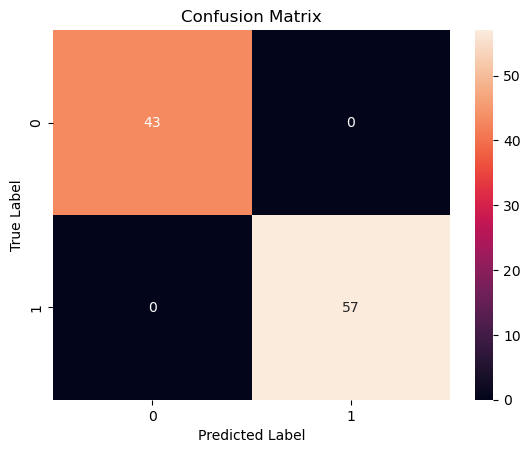

In [126]:


#create HistGradientBoostingClassifier
hgbc = HistGradientBoostingClassifier()

#train the model
hgbc.fit(X_train, Y_train)

#predict the test set results
Y_pred = hgbc.predict(X_test)

#evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))

#plot the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


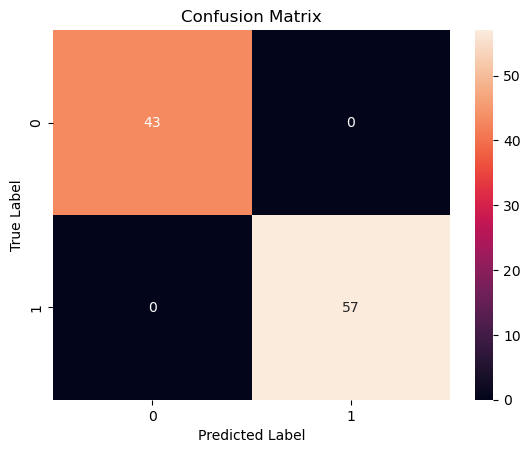

In [127]:
#create a random forest classifier
rfc = RandomForestClassifier()

#train the model
rfc.fit(X_train, Y_train)

#predict the test set results
Y_pred = rfc.predict(X_test)

#evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))

#plot the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


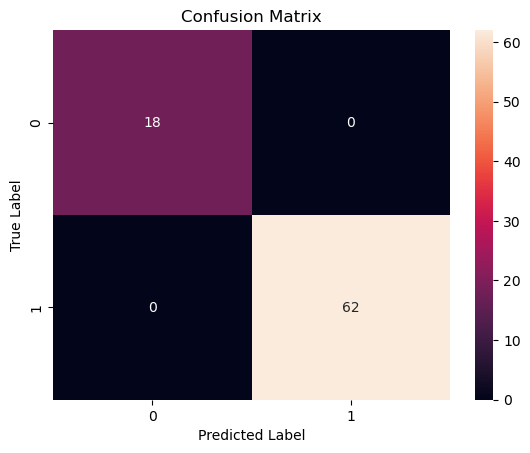

In [81]:
#create AdaBoostClassifier
rfc = AdaBoostClassifier()

#train the model
rfc.fit(X_train, Y_train)

#predict the test set results
Y_pred = rfc.predict(X_test)

#evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))

#plot the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
F1 Score:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        62

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



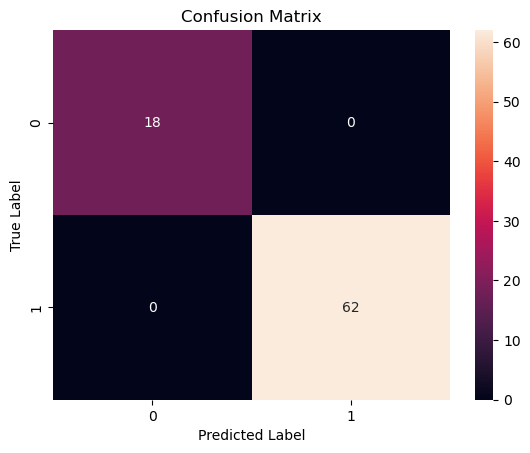

In [82]:
#create GradientBoostingClassifier
rfc = GradientBoostingClassifier()

#train the model
rfc.fit(X_train, Y_train)

#predict the test set results
Y_pred = rfc.predict(X_test)

#evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("F1 Score:", classification_report(Y_test, Y_pred))

#plot the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Accuracy: 0.97
Precision: 0.9821428571428571
Recall: 0.9649122807017544
F1 Score: 0.9734513274336283
F1 Score:               precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.98      0.96      0.97        57

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



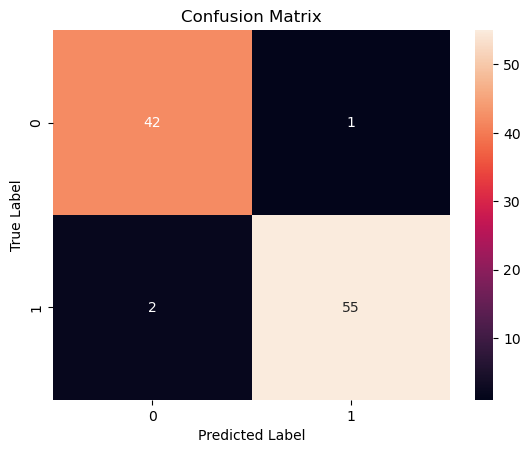

In [129]:
#create KNeighborsClassifier
knc = KNeighborsClassifier(3)

#train the model
knc.fit(X_train, Y_train)

#predict the test set results
Y_pred = knc.predict(X_test)

#evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("F1 Score:", classification_report(Y_test, Y_pred))

#plot the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
F1 Score:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        57

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



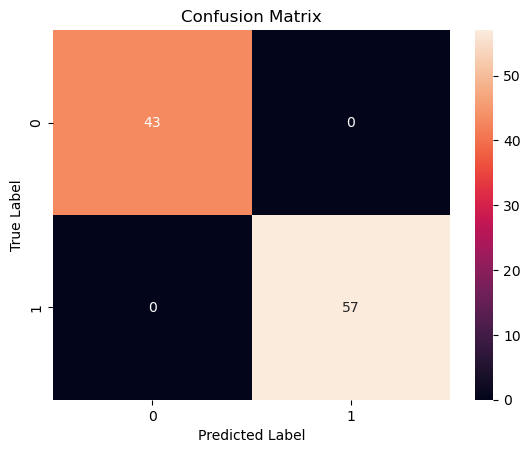

In [130]:
#create BaggingClassifier
bc = BaggingClassifier()

#train the model
bc.fit(X_train, Y_train)

#predict the test set results
Y_pred = bc.predict(X_test)

#evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("F1 Score:", classification_report(Y_test, Y_pred))

#plot the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Accuracy: 0.775
Precision: 0.775
Recall: 1.0
F1 Score: 0.8732394366197184
F1 Score:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.78      1.00      0.87        62

    accuracy                           0.78        80
   macro avg       0.39      0.50      0.44        80
weighted avg       0.60      0.78      0.68        80



C:\Users\erodi\anaconda3\envs\KidneyDisease\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\erodi\anaconda3\envs\KidneyDisease\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\erodi\anaconda3\envs\KidneyDisease\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

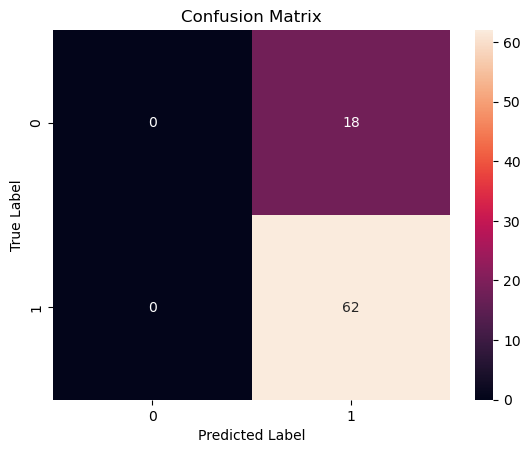

In [95]:
#create SVC
bc = SVC(gamma=2, C=1)

#train the model
bc.fit(X_train, Y_train)

#predict the test set results
Y_pred = bc.predict(X_test)

#evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("F1 Score:", classification_report(Y_test, Y_pred))

#plot the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Accuracy: 0.45
Precision: 1.0
Recall: 0.2903225806451613
F1 Score: 0.45000000000000007
F1 Score:               precision    recall  f1-score   support

           0       0.29      1.00      0.45        18
           1       1.00      0.29      0.45        62

    accuracy                           0.45        80
   macro avg       0.65      0.65      0.45        80
weighted avg       0.84      0.45      0.45        80



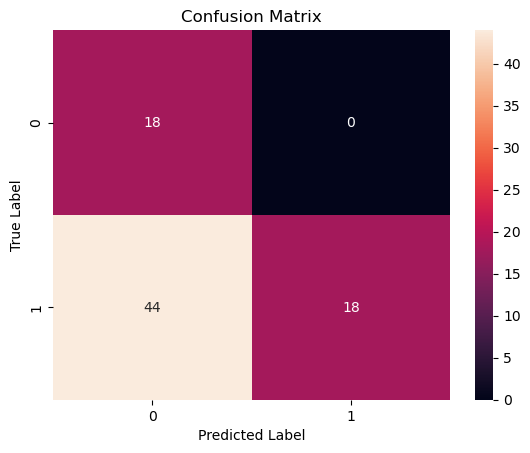

In [98]:
#create GaussianProcessClassifier
bc = GaussianProcessClassifier()

#train the model
bc.fit(X_train, Y_train)

#predict the test set results
Y_pred = bc.predict(X_test)

#evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("F1 Score:", classification_report(Y_test, Y_pred))

#plot the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Accuracy: 0.9875
Precision: 0.9841269841269841
Recall: 1.0
F1 Score: 0.9919999999999999
F1 Score:               precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.98      1.00      0.99        62

    accuracy                           0.99        80
   macro avg       0.99      0.97      0.98        80
weighted avg       0.99      0.99      0.99        80



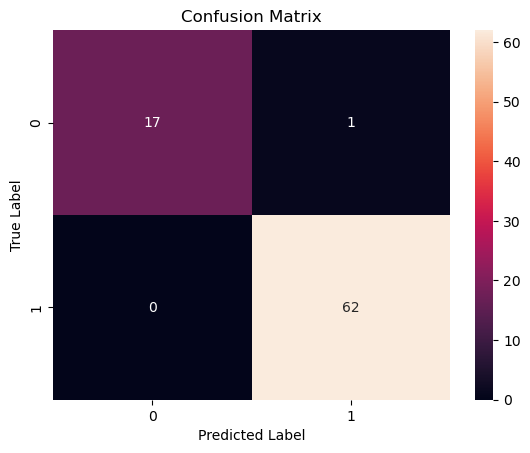

In [100]:
#create MLPClassifier
bc = MLPClassifier()

#train the model
bc.fit(X_train, Y_train)

#predict the test set results
Y_pred = bc.predict(X_test)

#evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("F1 Score:", classification_report(Y_test, Y_pred))

#plot the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
F1 Score:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        62

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



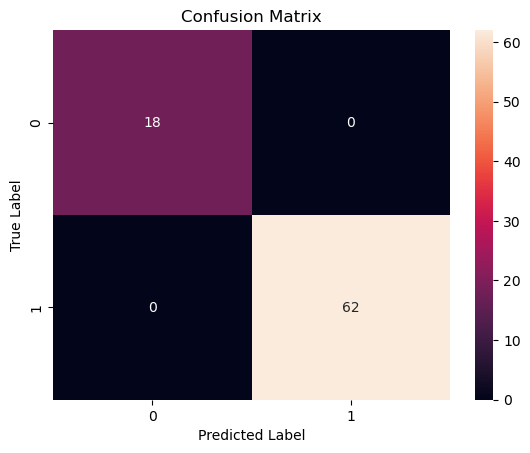

In [102]:
#create BaggingClassifier
bc = DecisionTreeClassifier()

#train the model
bc.fit(X_train, Y_train)

#predict the test set results
Y_pred = bc.predict(X_test)

#evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("F1 Score:", classification_report(Y_test, Y_pred))

#plot the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Accuracy: 0.975
Precision: 0.9838709677419355
Recall: 0.9838709677419355
F1 Score: 0.9838709677419355
F1 Score:               precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.98      0.98      0.98        62

    accuracy                           0.97        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.97      0.97      0.97        80



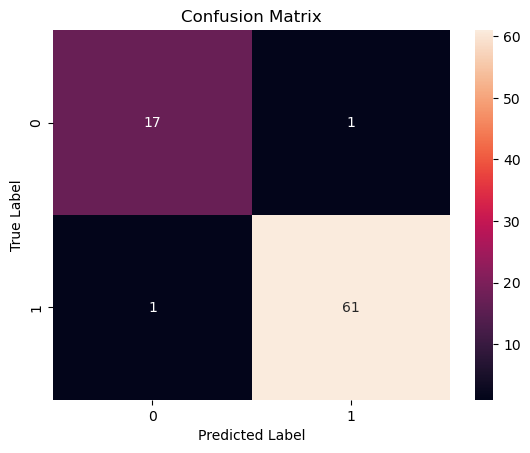

In [103]:
#create GaussianNB
bc = GaussianNB()

#train the model
bc.fit(X_train, Y_train)

#predict the test set results
Y_pred = bc.predict(X_test)

#evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("F1 Score:", classification_report(Y_test, Y_pred))

#plot the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Accuracy: 0.775
Precision: 0.775
Recall: 1.0
F1 Score: 0.8732394366197184
F1 Score:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.78      1.00      0.87        62

    accuracy                           0.78        80
   macro avg       0.39      0.50      0.44        80
weighted avg       0.60      0.78      0.68        80



C:\Users\erodi\anaconda3\envs\KidneyDisease\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\erodi\anaconda3\envs\KidneyDisease\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\erodi\anaconda3\envs\KidneyDisease\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\erodi\anaconda3\envs\KidneyDisease\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are

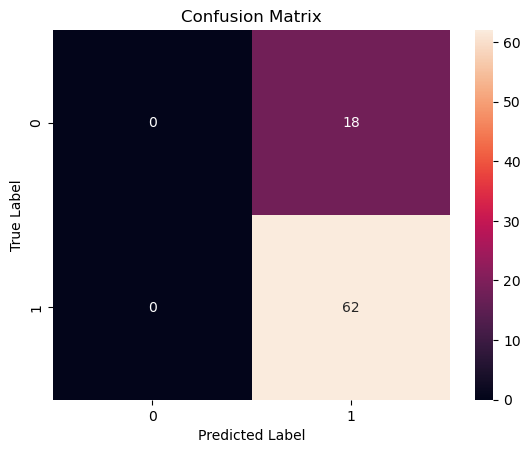

In [104]:
#create QuadraticDiscriminantAnalysis
bc = QuadraticDiscriminantAnalysis()

#train the model
bc.fit(X_train, Y_train)

#predict the test set results
Y_pred = bc.predict(X_test)

#evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("F1 Score:", classification_report(Y_test, Y_pred))

#plot the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()